In [ ]:
from google.colab import drive

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
!pip install scikit-optimize

from skopt import BayesSearchCV
%matplotlib inline

from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pathtest = "/content/drive/MyDrive/blastAI/test.csv"
#pathtrain = "/content/drive/MyDrive/blastAI/train.csv"
#dftest = pd.read_csv(pathtest, index_col = 0)
dftrain = pd.read_csv(pathtest, index_col = 0)

In [ ]:
dftrain

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [ ]:
#get_dummies
#X = pd.get_dummies(train_data, columns=[], drop_first=)

In [ ]:
#NUMERICAL ENCODING CODE
#X['Sex'].replace({'male': 0, 'female': 1}, inplace = True)

#to turn it in you need to convert to a csv
#to turn it in, transported column needs to be in true or false instead of 0,1
#Test[‘transported’] = pd.Series(predict_test).map({0:False, 1:True})

#perhaps fill in the columns with missing data with the fillna() functions
#for categorical variables do this:   df[co_name].value_counts.index[0]

print(dftrain.isnull().sum())
dftren = dftrain.dropna(axis=0)
#dftren is the new dataframe without null values
dftren.isnull().sum()
dftren


#print(dftren["Cabin"].value_counts())
#to convert
ohe = pd.get_dummies(dftren, columns = ['HomePlanet','Destination'], drop_first = True)
#print(ohe)

#dropping columns with strings
#dftrentwo= dftren.drop('HomePlanet', axis =1)
#
#dftrentwo = dftrentwo.drop('Destination', axis=1)
dftrentwo = ohe.drop('Name', axis = 1)

def test(index):
  cabin = dftrentwo['Cabin'][index].split('/')
  #print(cabin)
  #print(cabin[2] == 'S')
  if cabin[2] == 'S':
    dftrentwo['Cabin'][index] = 1
  elif cabin[2] == 'P':
    dftrentwo['Cabin'][index] = 0

for x in range(0,3281):
  test(x)
dftrentwo.value_counts()



#dftrentwo

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


<ipython-input-38-1ee43e3ed94e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrentwo['Cabin'][index] = 1
<ipython-input-38-1ee43e3ed94e>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrentwo['Cabin'][index] = 0


CryoSleep  Cabin  Age   VIP    RoomService  FoodCourt  ShoppingMall  Spa     VRDeck  HomePlanet_Europa  HomePlanet_Mars  Destination_PSO J318.5-22  Destination_TRAPPIST-1e
True       0      18.0  False  0.0          0.0        0.0           0.0     0.0     0                  0                0                          1                          13
False      1      0.0   False  0.0          0.0        0.0           0.0     0.0     0                  0                0                          1                          11
True       0      21.0  False  0.0          0.0        0.0           0.0     0.0     0                  0                0                          1                          10
                  19.0  False  0.0          0.0        0.0           0.0     0.0     0                  1                0                          1                          10
           1      0.0   False  0.0          0.0        0.0           0.0     0.0     0                  0           

Roomservice has an inverse correlation with transported

###RANDOMFORESTCLASSIFIER/DECISION TREE

In [ ]:
#dfbool = dftrentwo[dftrentwo['CryoSleep']].replace({True: 1, False: 0})
#dfbool = dftrentwo[dfbool['VIP']].replace({True: 1, False: 0})

#making the booleans into numbers for the bayesian optimization algorithm
ohenew = pd.get_dummies(dftrentwo, columns = ['CryoSleep','VIP'],drop_first = True)

ohenew['Transported_True']=None

X = ohenew.drop('Transported_True', axis = 1)
y = ohenew['Transported_True']


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state=101)

#dftrentwo
dftrentwo
ohenew

ohenew['CryoSleep_True'].value_counts()
ohenew['VIP_True'].value_counts()

0    3223
1      58
Name: VIP_True, dtype: int64

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
y_pred

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: ignored

forest

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, random_state=101)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [ ]:
rfc_pred = rfc.predict(X_test)
print(accuracy_score(y_test, rfc_pred))

0.7875882946518667


###BAYSIAN FOR RANDOM FORES

GRID SEARCH

In [ ]:
param_grid= {
    'max_depth' : [5,6,7,8,9,10,20,30,40,50,60,70],
    'min_samples_split' : [3,4,5,6,7,8, 9,10,11,12],
    'criterion' : ['gini', 'entropy']
}
grid = GridSearchCV(dtc, param_grid = param_grid, verbose = 3, refit = True)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=3;, score=0.776 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=3;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=3;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=3;, score=0.746 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=3;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_split=4;, score=0.776 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_split=4;, score=0.760 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_split=4;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_split=4;, score=0.746 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_split=4;, score=0.774 total

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 10}

In [ ]:
grid_preds = grid.predict(X_test)
print(accuracy_score(y_test, grid_preds))

0.781029263370333


In [ ]:
search_space = {
    'max_depth' : (1,200),
    'min_samples_split' : (1,10),
    'criterion' : ['gini', 'entropy']
}

In [ ]:
opt = BayesSearchCV(estimator = dtc,
                    search_spaces= search_space,
                    scoring = 'neg_mean_squared_error',
                    #how much u want the bayesian search to go on for is iter
                    n_iter = 5,
                    random_state = 100,
                    verbose = 3
                    )
opt

BayesSearchCV(estimator=DecisionTreeClassifier(), n_iter=5, random_state=100,
              scoring='neg_mean_squared_error',
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': (1, 200),
                             'min_samples_split': (1, 10)},
              verbose=3)

In [ ]:
opt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=35, min_samples_split=5;, score=-0.263 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=35, min_samples_split=5;, score=-0.263 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=35, min_samples_split=5;, score=-0.245 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=35, min_samples_split=5;, score=-0.286 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=35, min_samples_split=5;, score=-0.259 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=82, min_samples_split=8;, score=-0.264 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=82, min_samples_split=8;, score=-0.271 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=82, min_samples_split=8;, score=-0.234 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=82, min_samples_split=8;, score=-0.274 t

BayesSearchCV(estimator=DecisionTreeClassifier(), n_iter=5, random_state=100,
              scoring='neg_mean_squared_error',
              search_spaces={'criterion': ['gini', 'entropy'],
                             'max_depth': (1, 200),
                             'min_samples_split': (1, 10)},
              verbose=3)

In [ ]:
predictions= opt.predict(X_test)

In [ ]:
predictions

array([0, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:

print(accuracy_score(predictions, y_pred))

0.8264379414732593


logistic reg

In [ ]:
X = dftrentwo.drop('Transported', axis = 1)

y = dftrentwo['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [ ]:
#make/train model

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([False, False,  True, ..., False, False,  True])

In [ ]:
#check for accuracy
print(accuracy_score(y_test, predictions))

0.7821482602118003


In [ ]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[486 188]
 [100 548]]
              precision    recall  f1-score   support

       False       0.83      0.72      0.77       674
        True       0.74      0.85      0.79       648

    accuracy                           0.78      1322
   macro avg       0.79      0.78      0.78      1322
weighted avg       0.79      0.78      0.78      1322



<Axes: >

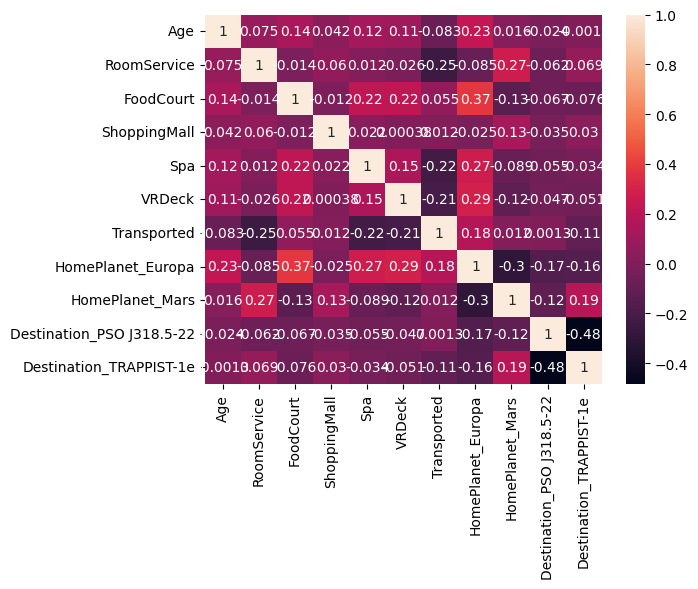

In [ ]:
sns.heatmap(dftrentwo.corr(numeric_only=True), annot=True)